In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import collections

# EPA

In [51]:
counties = pd.read_csv("abridged_couties.csv")
selected_columns = ['']
# counties.loc[:][["CountyName", "StateName"]]
counties

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4242,7.21,31850.0,25233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,15005,15.0,5.0,Kalawao,HI,NaN,NaN,NaN,21.188495,-156.979972,...,737509.0,737507.0,737504.0,737509.0,737500.0,737495.0,0.3162,NaN,NaN,NaN
3240,72039,72.0,39.0,Ciales Municipio,PR,NaN,NaN,NaN,18.314399,-66.494215,...,NaN,737500.0,737499.0,737499.0,737500.0,737495.0,NaN,NaN,NaN,NaN
3241,72069,72.0,69.0,Humacao Municipio,PR,NaN,NaN,NaN,18.144804,-65.817109,...,NaN,737500.0,737499.0,737499.0,737500.0,737495.0,NaN,NaN,NaN,NaN
3242,City1,NaN,NaN,New York City,NY,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
counties.columns

Index(['countyFIPS', 'STATEFP', 'COUNTYFP', 'CountyName', 'StateName', 'State',
       'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'CensusRegionName',
       'CensusDivisionName', 'Rural-UrbanContinuumCode2013',
       'PopulationEstimate2018', 'PopTotalMale2017', 'PopTotalFemale2017',
       'FracMale2017', 'PopulationEstimate65+2017',
       'PopulationDensityperSqMile2010', 'CensusPopulation2010',
       'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'P

In [53]:
confirmed = pd.read_csv("time_series_covid19_confirmed_US.csv")
confirmed


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,128,130,133,133,133,133,135,135,136,136
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,11,11,11,11,11,11,13,13,13,14
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,683,725,788,897,903,923,974,1043,1068,1118
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,45,50,51,51,51,51,51,51,51,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,84090055,US,USA,840,90055.0,Unassigned,Wisconsin,US,0.0000,0.0000,...,0,0,0,0,0,1,1,0,0,0
3251,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,0
3252,84099999,US,USA,840,99999.0,NaN,Grand Princess,US,0.0000,0.0000,...,103,103,103,103,103,103,103,103,103,103
3253,84070004,US,USA,840,NaN,Michigan Department of Corrections (MDOC),Michigan,US,0.0000,0.0000,...,0,0,0,0,370,429,472,472,514,550


# Confirmed cases slopes in different counties

In [54]:
cleaned_counties = confirmed.drop([ 'iso3', 'code3', 'FIPS','Country_Region', 'Lat', 'Long_', 
                                  'Combined_Key', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20','2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20'], axis = 1).dropna()


cleaned_counties = cleaned_counties.rename(columns = {'Admin2': 'County'})
cleaned_counties = cleaned_counties[cleaned_counties['4/18/20'] >3000]

cleaned_counties = cleaned_counties.sort_values(by = '4/18/20', ascending = False)
cleaned_counties = cleaned_counties.reset_index(drop = True)
cleaned_counties

,UID,iso2,County,Province_State,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,84036061,US,New York,New York,11,11,12,19,25,55,...,87028,92384,98308,103208,106763,110465,118302,123146,127352,135572
1,84036059,US,Nassau,New York,1,4,5,17,19,28,...,20140,21512,22584,23553,24358,25250,26715,27772,28539,29180
2,84036103,US,Suffolk,New York,0,0,1,1,1,6,...,18803,20320,20321,20934,21643,22691,23523,24812,25035,26143
3,84036119,US,Westchester,New York,19,57,83,98,98,121,...,17004,18077,18729,19313,19786,20191,20947,21828,22476,23179
4,84017031,US,Cook,Illinois,5,6,7,7,11,22,...,11415,12472,13417,14585,15474,16323,17306,18087,19391,20395
5,84026163,US,Wayne,Michigan,0,0,0,0,0,1,...,10093,10539,10951,11164,11648,12209,12544,12544,13233,13471
6,84034003,US,Bergen,New Jersey,2,4,4,4,7,11,...,8343,8928,9362,9784,10092,10426,10848,11409,11863,12163
7,84006037,US,Los Angeles,California,13,14,14,14,20,27,...,7955,8443,8453,8894,9433,10047,10517,10854,11400,12021
8,84034017,US,Hudson,New Jersey,0,0,1,1,1,1,...,5879,6411,6851,7469,7879,8242,8511,9165,9636,9956
9,84034013,US,Essex,New Jersey,0,0,0,0,0,0,...,6069,6580,7007,7410,7634,8212,8579,9084,9672,9901


### number of counties in different states that have more than 1000 confimed cases

In [55]:
collections.Counter(cleaned_counties['Province_State'])


Counter({'New York': 6,
         'Illinois': 1,
         'Michigan': 3,
         'New Jersey': 9,
         'California': 1,
         'Florida': 2,
         'Pennsylvania': 1,
         'Massachusetts': 4,
         'Connecticut': 3,
         'Louisiana': 2,
         'Washington': 1,
         'Texas': 1,
         'Indiana': 1,
         'Maryland': 1})

In [56]:
from datetime import datetime
dates = [datetime.strptime(s, '%m/%d/%y') for s in cleaned_counties.iloc[0, 4:].index]

In [57]:
counties_cases = pd.DataFrame({'Date': dates})

In [59]:
for i in range(len(cleaned_counties)):
    county = cleaned_counties.loc[i]['County']
    cases = cleaned_counties.iloc[i, 4:].values
    counties_cases[county] = cases

In [60]:
counties_cases

,Date,New York,Nassau,Suffolk,Westchester,Cook,Wayne,Bergen,Los Angeles,Hudson,...,Harris,Ocean,Monmouth,Macomb,Morris,Broward,Norfolk,Marion,Hartford,Prince George's
0,2020-03-06,11,1,3,19,5,0,2,13,0,...,3,0,0,0,0,0,2,1,0,0
1,2020-03-07,11,4,3,57,6,0,4,14,0,...,5,0,0,0,0,2,2,1,0,0
2,2020-03-08,12,5,8,83,7,0,4,14,1,...,5,0,0,0,0,2,6,1,0,0
3,2020-03-09,19,17,8,98,7,0,4,14,1,...,6,0,0,0,0,3,6,1,0,0
4,2020-03-10,25,19,10,98,11,0,7,20,1,...,6,0,2,0,0,4,10,1,0,3
5,2020-03-11,55,28,20,121,22,1,11,27,1,...,7,0,4,0,0,4,22,1,0,3
6,2020-03-12,95,41,22,148,27,1,13,32,1,...,9,0,5,0,1,7,24,2,0,4
7,2020-03-13,154,51,26,158,40,2,15,40,4,...,9,1,8,0,3,11,24,2,0,6
8,2020-03-14,269,68,27,172,50,6,25,53,5,...,11,1,8,1,3,20,28,3,1,7
9,2020-03-15,269,79,27,178,50,8,25,53,5,...,11,1,8,2,3,36,28,6,2,7


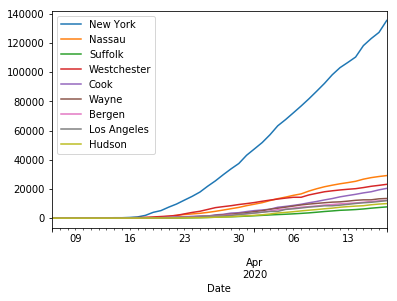

In [92]:
counties_cases.iloc[:,: 10].plot('Date')


In [65]:
collections.Counter(counties['SVIPercentile'])

Counter({0.4354: 1,
         0.2162: 1,
         0.9959: 1,
         0.6003: 1,
         0.4242: 1,
         0.8898: 1,
         0.8653: 1,
         0.8252: 1,
         0.7382: 1,
         0.4516: 1,
         0.7602: 1,
         0.8748: 1,
         0.8471: 1,
         0.564: 1,
         0.5417: 1,
         0.5408: 1,
         0.4274: 1,
         0.8086: 1,
         0.5261: 1,
         0.7723: 1,
         0.6873: 1,
         0.5182: 1,
         0.7599: 1,
         0.949: 1,
         0.8022: 1,
         0.5401: 1,
         0.8557: 1,
         0.6564: 2,
         0.7038: 1,
         0.8417: 1,
         0.7955: 1,
         0.9854: 1,
         0.9599: 1,
         0.5519: 1,
         0.6838: 1,
         0.5726: 1,
         0.6621: 1,
         0.6264: 1,
         0.4468: 2,
         0.4952: 1,
         0.6602: 1,
         0.5296: 1,
         0.9188: 1,
         0.8971: 1,
         0.3076: 1,
         0.7621: 1,
         0.6709999999999999: 1,
         0.7261: 1,
         0.7532: 1,
         0

In [66]:
collections.Counter(counties['>50 gatherings'])
print()

In [41]:

counties["MaleAge<10"] = counties["PopMale<52010"] + counties["PopMale5-92010"]
counties["MaleAge10-19"] = counties["PopMale10-142010"] + counties["PopMale15-192010"]
counties["MaleAge20-34"] = counties["PopMale20-242010"] + counties["PopMale25-292010"] + counties["PopMale30-342010"] 
counties["MaleAge35-54"] = counties["PopMale35-442010"] + counties["PopMale45-542010"] 
counties["MaleAge55-74"] = counties["PopMale55-592010"] + counties["PopMale60-642010"] + counties["PopMale65-742010"]
counties["MaleAge>74"] = counties["PopMale75-842010"] + counties["PopMale>842010"]

counties["FmleAge<10"] = counties["PopFmle<52010"] + counties["PopFmle5-92010"]
counties["FmleAge10-19"] = counties["PopFmle10-142010"] + counties["PopFmle15-192010"]
counties["FmleAge20-34"] = counties["PopFmle20-242010"] + counties["PopFmle25-292010"] + counties["PopFmle30-342010"] 
counties["FmleAge35-54"] = counties["PopFmle35-442010"] + counties["PopFmle45-542010"] 
counties["FmleAge55-74"] = counties["PopFmle55-592010"] + counties["PopFmle60-642010"] + counties["PopFmle65-742010"]
counties["FmleAge>74"] = counties["PopFmle75-842010"] + counties["PopFmle>842010"]

In [67]:
counties = counties.loc[:, ["CountyName", "State", "PopTotalMale2017", "PopTotalFemale2017", "PopulationEstimate2018", "DiabetesPercentage", 
                 "HeartDiseaseMortality", "StrokeMortality", "Smokers_Percentage", "RespMortalityRate2014", "MaleAge<10", "MaleAge10-19",
                "MaleAge20-34", "MaleAge35-54", "MaleAge55-74", "MaleAge>74", "FmleAge<10", "FmleAge10-19", "FmleAge20-34", 
                 "FmleAge35-54","FmleAge55-74", "FmleAge>74",'PopulationDensityperSqMile2010', '#EligibleforMedicare2018', 'SVIPercentile']]
counties


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,CountyName,State,PopTotalMale2017,PopTotalFemale2017,PopulationEstimate2018,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,...,MaleAge>74,FmleAge<10,FmleAge10-19,FmleAge20-34,FmleAge35-54,FmleAge55-74,FmleAge>74,PopulationDensityperSqMile2010,#EligibleforMedicare2018,SVIPercentile
0,Autauga,Alabama,27007.0,28497.0,55601.0,9.9,204.5,56.1,18.081557,81.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.8,11439.0,0.4354
1,Baldwin,Alabama,103225.0,109403.0,218022.0,8.5,183.2,41.9,17.489033,54.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.7,54145.0,0.2162
2,Barbour,Alabama,13335.0,11935.0,24881.0,15.7,220.4,49.0,21.999985,69.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,6681.0,0.9959
3,Bibb,Alabama,12138.0,10530.0,22400.0,13.3,225.5,57.2,19.114200,84.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.8,5128.0,0.6003
4,Blount,Alabama,28607.0,29406.0,57840.0,14.9,224.8,52.8,19.208672,87.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.9,13175.0,0.4242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,Kalawao,NaN,42.0,46.0,88.0,6.5,124.5,28.5,12.195113,32.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,0.3162
3240,Ciales Municipio,NaN,8051.0,8576.0,15918.0,16.0,NaN,26.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,282.3,5152.0,NaN
3241,Humacao Municipio,NaN,24835.0,27936.0,50532.0,14.4,108.4,24.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1306.4,19035.0,NaN
3242,New York City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
confirmed = confirmed.loc[:, ["Admin2", "Province_State", "2/1/20", "2/11/20", "2/21/20", "3/1/20", "3/11/20", "3/21/20", "4/1/20", "4/11/20", "4/18/20"]]
confirmed["CountyName"] = confirmed["Admin2"]
confirmed["State"] = confirmed["Province_State"]

In [69]:
confirmed = confirmed.drop("Admin2", axis = 1).drop("Province_State", axis = 1)


In [70]:
confirmed.columns

Index(['2/1/20', '2/11/20', '2/21/20', '3/1/20', '3/11/20', '3/21/20',
       '4/1/20', '4/11/20', '4/18/20', 'CountyName', 'State'],
      dtype='object')

In [71]:
combine = pd.merge(counties, confirmed, how = "inner", on = ["CountyName", "State"])

In [72]:
counties.columns

Index(['CountyName', 'State', 'PopTotalMale2017', 'PopTotalFemale2017',
       'PopulationEstimate2018', 'DiabetesPercentage', 'HeartDiseaseMortality',
       'StrokeMortality', 'Smokers_Percentage', 'RespMortalityRate2014',
       'MaleAge<10', 'MaleAge10-19', 'MaleAge20-34', 'MaleAge35-54',
       'MaleAge55-74', 'MaleAge>74', 'FmleAge<10', 'FmleAge10-19',
       'FmleAge20-34', 'FmleAge35-54', 'FmleAge55-74', 'FmleAge>74',
       'PopulationDensityperSqMile2010', '#EligibleforMedicare2018',
       'SVIPercentile'],
      dtype='object')

In [73]:
combine.columns

Index(['CountyName', 'State', 'PopTotalMale2017', 'PopTotalFemale2017',
       'PopulationEstimate2018', 'DiabetesPercentage', 'HeartDiseaseMortality',
       'StrokeMortality', 'Smokers_Percentage', 'RespMortalityRate2014',
       'MaleAge<10', 'MaleAge10-19', 'MaleAge20-34', 'MaleAge35-54',
       'MaleAge55-74', 'MaleAge>74', 'FmleAge<10', 'FmleAge10-19',
       'FmleAge20-34', 'FmleAge35-54', 'FmleAge55-74', 'FmleAge>74',
       'PopulationDensityperSqMile2010', '#EligibleforMedicare2018',
       'SVIPercentile', '2/1/20', '2/11/20', '2/21/20', '3/1/20', '3/11/20',
       '3/21/20', '4/1/20', '4/11/20', '4/18/20'],
      dtype='object')

In [81]:
selected_counties = cleaned_counties.loc[:10]['County'] + ", " + cleaned_counties.loc[:10]['Province_State']
selected_counties

0          New York, New York
1            Nassau, New York
2           Suffolk, New York
3       Westchester, New York
4              Cook, Illinois
5             Wayne, Michigan
6          Bergen, New Jersey
7     Los Angeles, California
8          Hudson, New Jersey
9           Essex, New Jersey
10         Rockland, New York
dtype: object

In [82]:
combine['County'] = combine['CountyName'] + ", " + combine['State']

In [83]:
combine

,CountyName,State,PopTotalMale2017,PopTotalFemale2017,PopulationEstimate2018,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,...,2/1/20,2/11/20,2/21/20,3/1/20,3/11/20,3/21/20,4/1/20,4/11/20,4/18/20,County
0,Autauga,Alabama,27007.0,28497.0,55601.0,9.9,204.5,56.1,18.081557,81.79,...,0,0,0,0,0,0,8,19,25,"Autauga, Alabama"
1,Baldwin,Alabama,103225.0,109403.0,218022.0,8.5,183.2,41.9,17.489033,54.28,...,0,0,0,0,0,2,20,66,109,"Baldwin, Alabama"
2,Barbour,Alabama,13335.0,11935.0,24881.0,15.7,220.4,49.0,21.999985,69.82,...,0,0,0,0,0,0,0,9,18,"Barbour, Alabama"
3,Bibb,Alabama,12138.0,10530.0,22400.0,13.3,225.5,57.2,19.114200,84.49,...,0,0,0,0,0,0,3,13,26,"Bibb, Alabama"
4,Blount,Alabama,28607.0,29406.0,57840.0,14.9,224.8,52.8,19.208672,87.05,...,0,0,0,0,0,0,5,12,20,"Blount, Alabama"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,Uinta,Wyoming,10335.0,10160.0,20299.0,10.5,184.6,32.0,17.212675,81.51,...,0,0,0,0,0,0,0,4,6,"Uinta, Wyoming"
3020,Washakie,Wyoming,4075.0,3989.0,7885.0,9.3,157.1,31.4,16.859400,59.36,...,0,0,0,0,0,0,1,5,5,"Washakie, Wyoming"
3021,Weston,Wyoming,3634.0,3293.0,6967.0,7.2,149.3,29.5,16.693134,81.68,...,0,0,0,0,0,0,0,0,0,"Weston, Wyoming"
3022,Broomfield,Colorado,33991.0,34350.0,69267.0,6.5,113.8,34.5,11.625378,57.93,...,0,0,0,0,0,1,20,68,98,"Broomfield, Colorado"


In [84]:
top10 = combine[combine['County'].isin(selected_counties)]
top10 

,CountyName,State,PopTotalMale2017,PopTotalFemale2017,PopulationEstimate2018,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,...,2/1/20,2/11/20,2/21/20,3/1/20,3/11/20,3/21/20,4/1/20,4/11/20,4/18/20,County
172,Los Angeles,California,5009834.0,5153673.0,10105518.0,8.1,150.8,33.9,10.847678,34.94,...,1,1,1,1,27,292,3518,8453,12021,"Los Angeles, California"
566,Cook,Illinois,2530605.0,2680658.0,5180493.0,9.0,175.1,38.7,13.776183,41.02,...,2,2,2,3,22,548,5152,13417,20395,"Cook, Illinois"
1244,Wayne,Michigan,844123.0,909493.0,1753893.0,10.3,259.2,40.9,21.055530,53.48,...,0,0,0,0,1,102,4470,10951,13471,"Wayne, Michigan"
1699,Bergen,New Jersey,460107.0,488299.0,936692.0,6.8,140.1,27.3,11.410987,29.49,...,0,0,0,0,11,363,3494,9362,12163,"Bergen, New Jersey"
1704,Essex,New Jersey,388841.0,419444.0,799767.0,9.9,169.8,32.5,14.235389,33.96,...,0,0,0,0,0,107,2262,7007,9901,"Essex, New Jersey"
1706,Hudson,New Jersey,343699.0,347944.0,676061.0,8.2,157.6,30.3,15.382038,34.89,...,0,0,0,0,1,97,1910,6851,9956,"Hudson, New Jersey"
1781,Nassau,New York,666014.0,703500.0,1358343.0,7.2,188.2,23.3,11.225365,29.03,...,0,0,0,0,28,1234,9554,22584,29180,"Nassau, New York"
1782,New York,New York,789070.0,875657.0,1628701.0,6.5,143.5,18.9,12.418234,23.47,...,0,0,0,0,55,7530,47439,98308,135572,"New York, New York"
1795,Rockland,New York,161115.0,167753.0,325695.0,6.9,150.9,25.2,12.165288,33.58,...,0,0,0,0,6,262,3321,7477,9171,"Rockland, New York"
1802,Suffolk,New York,735331.0,757622.0,1481093.0,6.8,181.8,25.3,12.625481,38.59,...,0,0,0,0,6,662,7605,20321,26143,"Suffolk, New York"


In [85]:
c = combine.sort_values(by = 'PopulationEstimate2018', ascending = False).reset_index(drop = True)


In [86]:
def possible_factor(name):
    sort = combine.sort_values(by = name, ascending = False).reset_index(drop = True)
    print(f'rank of {name} of top 10 counties')
    print(f'total counties: {len(sort)}')
    for c in top10['County']:
        rank = list(sort['County']).index(c)
        print(f'{c} : {rank}')
    


In [87]:
possible_factor('DiabetesPercentage')

rank of DiabetesPercentage of top 10 counties
total counties: 3024
Los Angeles, California : 2159
Cook, Illinois : 1825
Wayne, Michigan : 1356
Bergen, New Jersey : 2542
Essex, New Jersey : 1502
Hudson, New Jersey : 2117
Nassau, New York : 2435
New York, New York : 2621
Rockland, New York : 2498
Suffolk, New York : 2560
Westchester, New York : 2640


In [88]:
factors = ['PopulationEstimate2018', 'DiabetesPercentage', 'HeartDiseaseMortality',
       'StrokeMortality', 'Smokers_Percentage', 'RespMortalityRate2014',
       'MaleAge<10', 'MaleAge10-19', 'MaleAge20-34', 'MaleAge35-54',
       'MaleAge55-74', 'MaleAge>74', 'FmleAge<10', 'FmleAge10-19',
       'FmleAge20-34', 'FmleAge35-54', 'FmleAge55-74', 'FmleAge>74','PopulationDensityperSqMile2010', '#EligibleforMedicare2018',
       'SVIPercentile']


In [89]:
for f in factors:
    possible_factor(f)
    print()

rank of PopulationEstimate2018 of top 10 counties
total counties: 3024
Los Angeles, California : 0
Cook, Illinois : 1
Wayne, Michigan : 18
Bergen, New Jersey : 52
Essex, New Jersey : 74
Hudson, New Jersey : 93
Nassau, New York : 29
New York, New York : 20
Rockland, New York : 205
Suffolk, New York : 25
Westchester, New York : 47

rank of DiabetesPercentage of top 10 counties
total counties: 3024
Los Angeles, California : 2159
Cook, Illinois : 1825
Wayne, Michigan : 1356
Bergen, New Jersey : 2542
Essex, New Jersey : 1502
Hudson, New Jersey : 2117
Nassau, New York : 2435
New York, New York : 2621
Rockland, New York : 2498
Suffolk, New York : 2560
Westchester, New York : 2640

rank of HeartDiseaseMortality of top 10 counties
total counties: 3024
Los Angeles, California : 2380
Cook, Illinois : 1643
Wayne, Michigan : 191
Bergen, New Jersey : 2659
Essex, New Jersey : 1803
Hudson, New Jersey : 2184
Nassau, New York : 1260
New York, New York : 2566
Rockland, New York : 2374
Suffolk, New York :